# これをまるまるコピーしながら勉強する．
https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

D:\Programming\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [9]:
ls input

 ドライブ D のボリューム ラベルがありません。
 ボリューム シリアル番号は 0C79-ECE5 です

 D:\Repository\kaggle\input のディレクトリ

2017/09/30  20:31    <DIR>          .
2017/09/30  20:31    <DIR>          ..
2017/09/30  20:31            28,629 test.csv
2017/09/30  20:31            61,194 train.csv
               2 個のファイル              89,823 バイト
               2 個のディレクトリ  1,432,265,211,904 バイトの空き領域


In [11]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("input/train.csv")
test    = pd.read_csv("input/test.csv")

In [12]:
full = train.append(test, ignore_index=True)

In [15]:
titanic = full[:891]

In [16]:
del train, test

In [17]:
print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [18]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [20]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


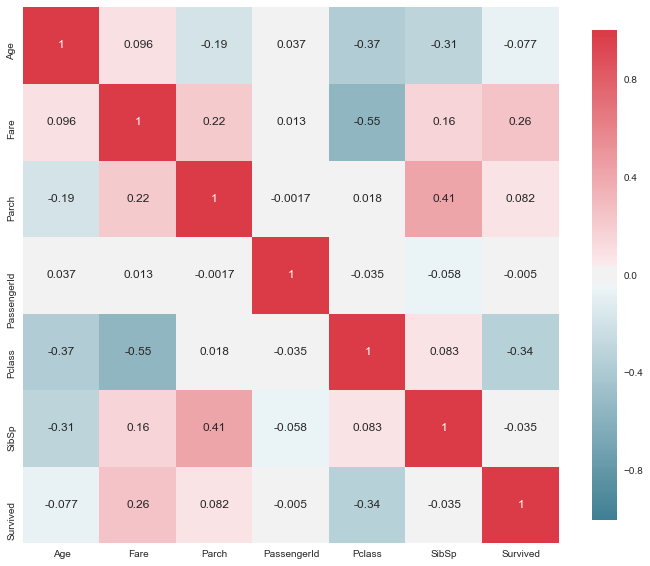

In [21]:
plot_correlation_map(titanic)

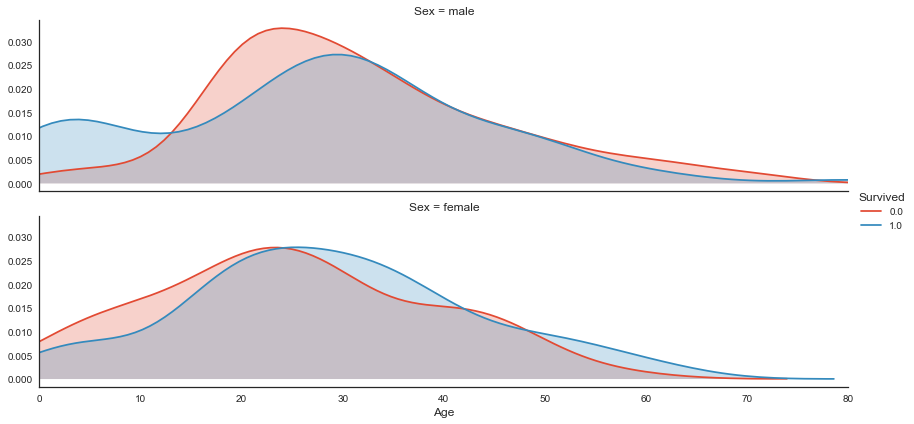

In [22]:
plot_distribution(titanic, var="Age", target="Survived", row="Sex")

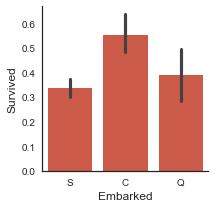

In [23]:
plot_categories(titanic, cat="Embarked", target="Survived")

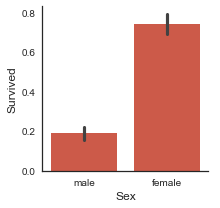

In [24]:
plot_categories(titanic, cat="Sex", target="Survived")

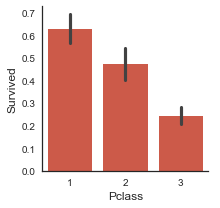

In [25]:
plot_categories(titanic, cat="Pclass", target="Survived")

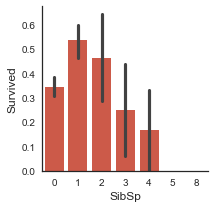

In [26]:
plot_categories(titanic, cat="SibSp", target="Survived")

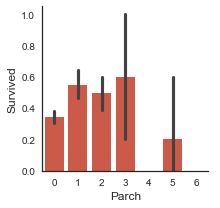

In [27]:
plot_categories(titanic, cat="Parch", target="Survived")

In [28]:
# 男性なら1，女性なら0．
# データでは文字列になっているが，それを数字に切り替える
sex = pd.Series(np.where(full.Sex=="male", 1, 0) , name="Sex")

In [29]:
sex

0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
       ..
1279    1
1280    1
1281    1
1282    0
1283    1
1284    1
1285    1
1286    0
1287    1
1288    0
1289    1
1290    1
1291    0
1292    1
1293    0
1294    1
1295    1
1296    1
1297    1
1298    1
1299    0
1300    0
1301    0
1302    0
1303    0
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, dtype: int32

In [30]:
# 2つならさっきの関数でいけるけど，2つ以上ならこちらを使う．
# 内容に応じて名前を付けてワンホットの情報にしてくれる．便利～．
embarked = pd.get_dummies(full.Embarked, prefix="Embarked")

In [31]:
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
pclass = pd.get_dummies(full.Pclass, prefix="Pclass")

In [34]:
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [40]:
imputed = pd.DataFrame()

In [41]:
# 欠損値を平均値で埋める処理．平均値以外でも（0で決め打ちとか）できる．
imputed["Age"] = full.Age.fillna(full.Age.mean())

In [42]:
imputed["Fare"] = full.Fare.fillna(full.Fare.mean())

In [43]:
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [75]:
title = pd.DataFrame()
# Nameから取り出したい要素を拾ってくる
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

In [76]:
title.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [80]:
# どんな種類があるか見てみる
uniq_title = title.drop_duplicates() # pandasのバージョン古いから使えないけど，#unique()でもいけるらしい
uniq_title

,Title
0,Mr
1,Mrs
2,Miss
7,Master
30,Don
149,Rev
245,Dr
369,Mme
443,Ms
449,Major


In [81]:
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }


In [82]:
# 辞書
title[ 'Title' ] = title.Title.map( Title_Dictionary )

In [83]:
title.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [84]:
title = pd.get_dummies( title.Title )

In [85]:
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


,Master,Miss,Mr,Mrs,Officer,Royalty
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.046600,0.200153,0.578304,0.152788,0.017571,0.004584
std,0.210862,0.400267,0.494019,0.359921,0.131435,0.067573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
cabin = pd.DataFrame()

In [87]:
# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

In [88]:
cabin.head()

,Cabin
0,U
1,C85
2,U
3,C123
4,U


In [90]:
# 頭文字だけ残す（種類はそれだけで分かるため） 
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )
cabin.head()

,Cabin
0,U
1,C
2,U
3,C
4,U


In [91]:
# わかりづらいから読みやすくするためにPrefixをつける
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

In [92]:
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [94]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [96]:
ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [98]:
full["Ticket"]

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
5                   330877
6                    17463
7                   349909
8                   347742
9                   237736
10                 PP 9549
11                  113783
12               A/5. 2151
13                  347082
14                  350406
15                  248706
16                  382652
17                  244373
18                  345763
19                    2649
20                  239865
21                  248698
22                  330923
23                  113788
24                  349909
25                  347077
26                    2631
27                   19950
28                  330959
29                  349216
               ...        
1279                364858
1280                349909
1281                 12749
1282              PC 17592
1283             C.A. 2673
1284            C.A. 30769
1

In [99]:
# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket
full_X = pd.concat( [ imputed , embarked , cabin , sex ] , axis=1 )
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [100]:
train_valid_X = full_X[0:891]
train_valid_y = titanic.Survived

In [101]:
test_X = full_X[:891]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

In [102]:
print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 15) (623, 15) (268, 15) (623,) (268,) (891, 15)


0.983948635634


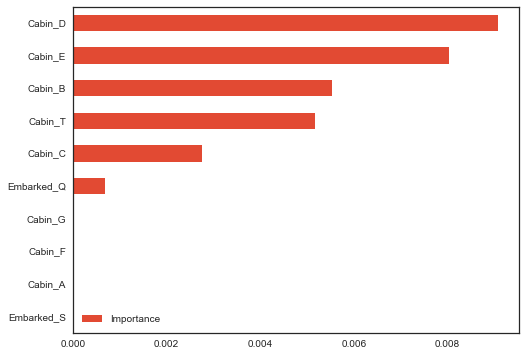

In [104]:
plot_variable_importance(train_X, train_y)
# 裏で決定木分析をして，変数の重要性を見ている．


利用している関数はこれ　http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


中で使っているCART法はこの辺が詳しい　http://alfredplpl.hatenablog.com/entry/2013/12/24/225420


ジニ多様性指標（ジニ係数），たとえば1と0が生成される説明変数があった時，それがばらついているほど値が大きくなるという気持ち．
どこかの変数で分割したときに，ジニ係数が小さくなる→その変数で分割したあとはばらつきが小さくなっている→重要な変数．みたいな．なるほどー．

こっから先は気が向いたらやる．